In [463]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/Users/sa2/Desktop/TKH/House-Prices-Phase-2/train.csv")

## Categorical and Numerical

In [464]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

(1460, 81)

81 features describing various aspects of homes in Ames, Iowa. will drop id, and split them into categorical and numerical data sets

In [465]:
# columns by data type
object_cols = df.select_dtypes('object').columns.tolist()
int_cols = df.select_dtypes('int64').columns.tolist()
float_cols = df.select_dtypes('float64').columns.tolist()

# displays number of columns
print(f"Object columns: {len(object_cols)}")
print(f"Integer columns: {len(int_cols)}")
print(f"Float columns: {len(float_cols)}")

# displays columns under each type
print("\nObject columns:")
for col in object_cols:
    print(f"- {col}")
print("\nInteger columns:")
for col in int_cols:
    print(f"- {col}")
print("\nFloat columns:")
for col in float_cols:
    print(f"- {col}")

Object columns: 43
Integer columns: 35
Float columns: 3

Object columns:
- MSZoning
- Street
- Alley
- LotShape
- LandContour
- Utilities
- LotConfig
- LandSlope
- Neighborhood
- Condition1
- Condition2
- BldgType
- HouseStyle
- RoofStyle
- RoofMatl
- Exterior1st
- Exterior2nd
- MasVnrType
- ExterQual
- ExterCond
- Foundation
- BsmtQual
- BsmtCond
- BsmtExposure
- BsmtFinType1
- BsmtFinType2
- Heating
- HeatingQC
- CentralAir
- Electrical
- KitchenQual
- Functional
- FireplaceQu
- GarageType
- GarageFinish
- GarageQual
- GarageCond
- PavedDrive
- PoolQC
- Fence
- MiscFeature
- SaleType
- SaleCondition

Integer columns:
- Id
- MSSubClass
- LotArea
- OverallQual
- OverallCond
- YearBuilt
- YearRemodAdd
- BsmtFinSF1
- BsmtFinSF2
- BsmtUnfSF
- TotalBsmtSF
- 1stFlrSF
- 2ndFlrSF
- LowQualFinSF
- GrLivArea
- BsmtFullBath
- BsmtHalfBath
- FullBath
- HalfBath
- BedroomAbvGr
- KitchenAbvGr
- TotRmsAbvGrd
- Fireplaces
- GarageCars
- GarageArea
- WoodDeckSF
- OpenPorchSF
- EnclosedPorch
- 3SsnPorc

three data types, integer and float columns will result in 37 numerical features, and object coulmns will result in 43 categorical features

In [466]:
dfnum= df.select_dtypes(include=['int64', 'float64']).drop(columns=['Id'])
dfcat= df.select_dtypes(include=['object'])

## Null Value Analysis

In [467]:
# count of missing values for each column with missing values
missing = df.isnull().sum()[df.isnull().sum() > 0].sort_values()
# calculate the percentage of missing values
percent = (missing / len(df)) * 100
# combining both
missing_data = pd.DataFrame({'Missing Values': missing,'Percentage (%)': percent.round(2)})

print(missing_data)

              Missing Values  Percentage (%)
Electrical                 1            0.07
MasVnrArea                 8            0.55
BsmtQual                  37            2.53
BsmtCond                  37            2.53
BsmtFinType1              37            2.53
BsmtExposure              38            2.60
BsmtFinType2              38            2.60
GarageCond                81            5.55
GarageQual                81            5.55
GarageFinish              81            5.55
GarageYrBlt               81            5.55
GarageType                81            5.55
LotFrontage              259           17.74
FireplaceQu              690           47.26
MasVnrType               872           59.73
Fence                   1179           80.75
Alley                   1369           93.77
MiscFeature             1406           96.30
PoolQC                  1453           99.52


<Axes: >

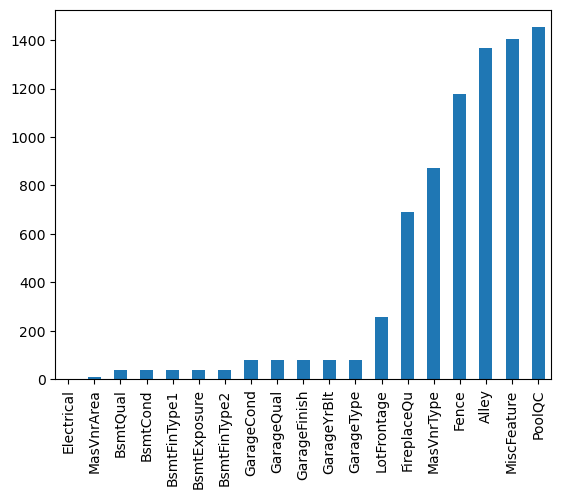

In [468]:
missing.plot.bar()

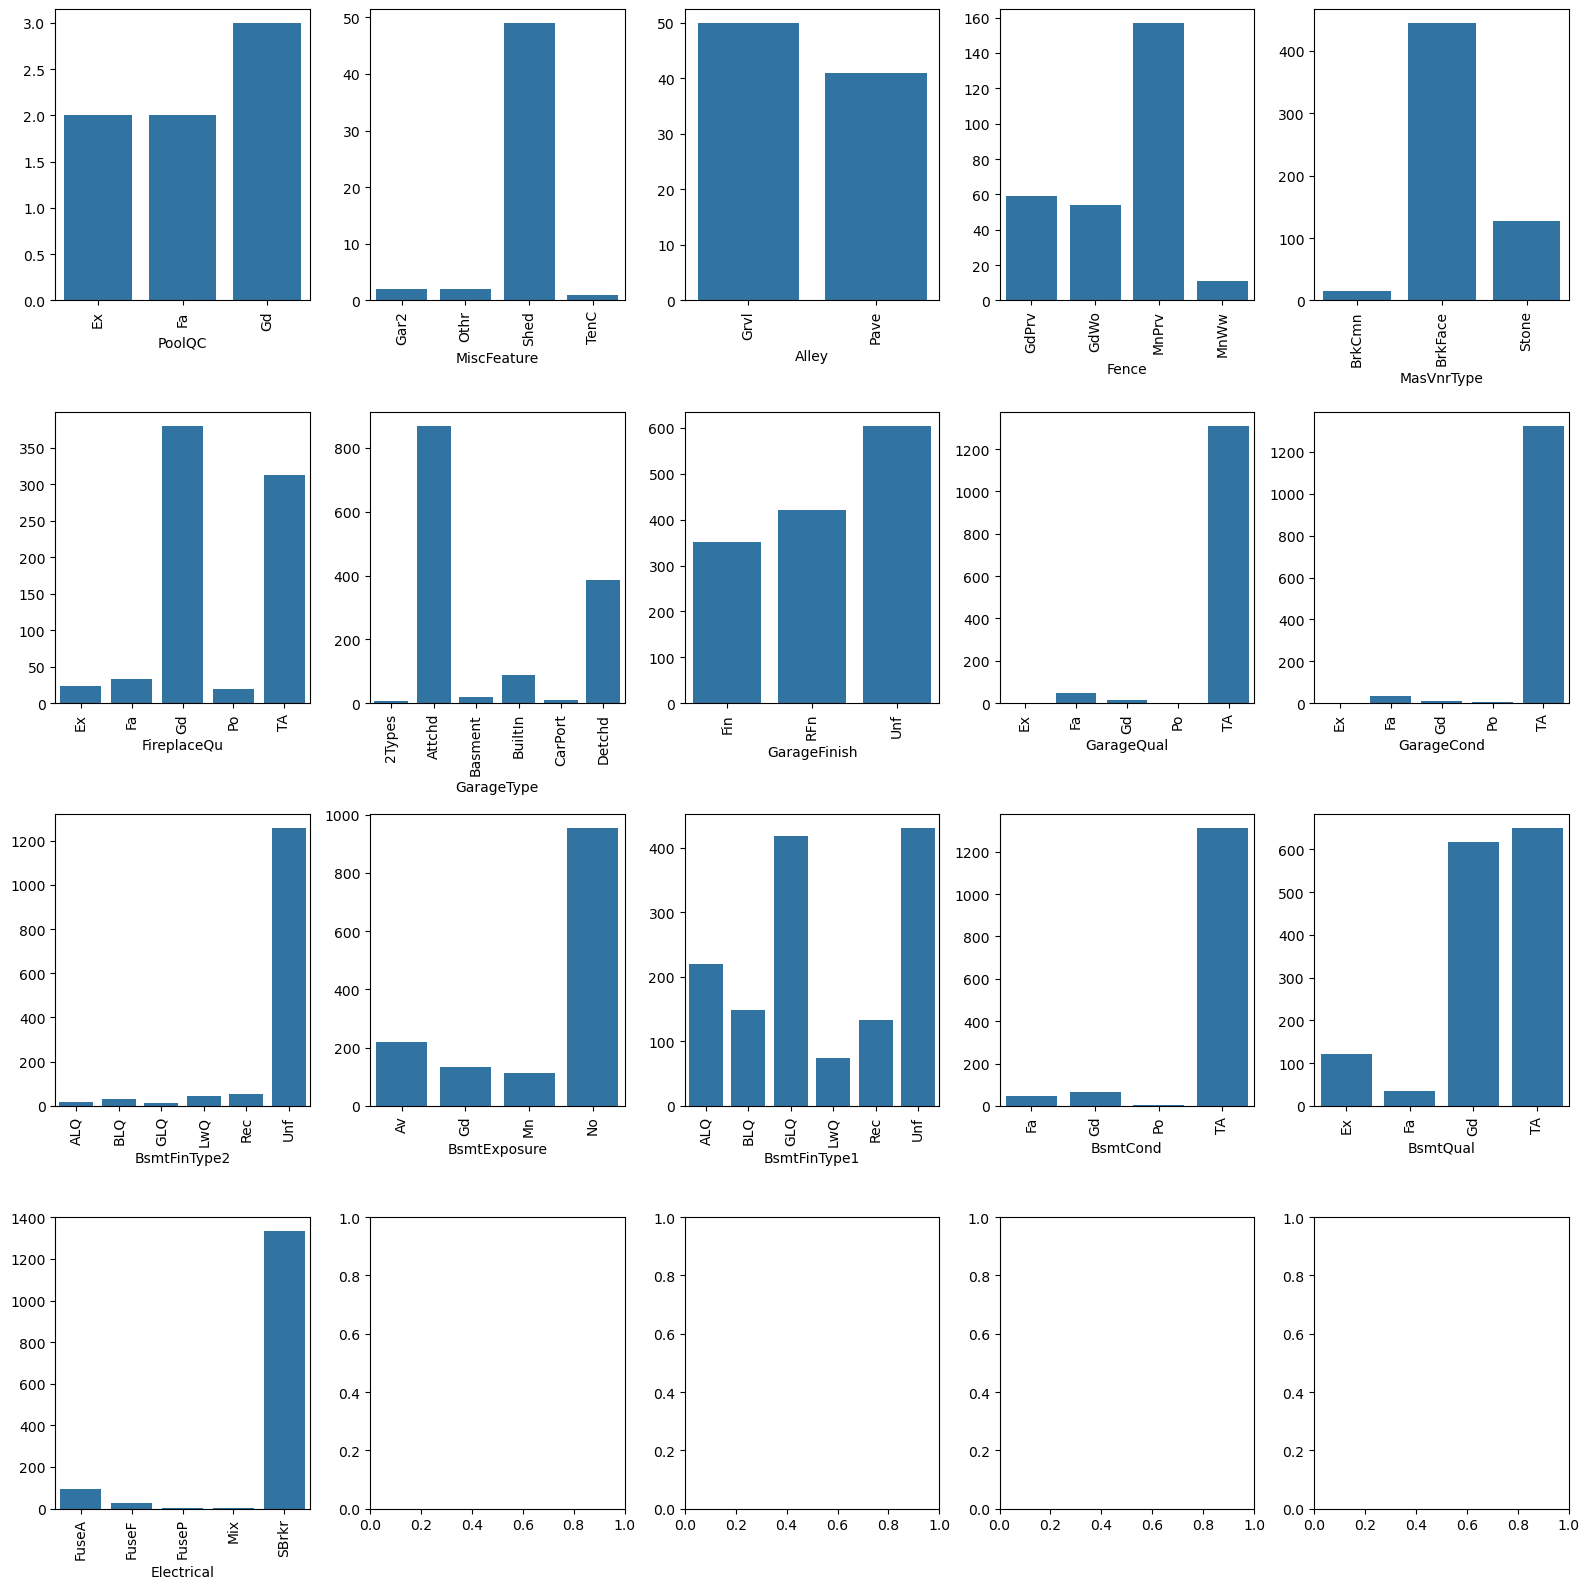

        Count  Percentage (%)
PoolQC                       
Ex          2            0.14
Fa          2            0.14
Gd          3            0.21
             Count  Percentage (%)
MiscFeature                       
Gar2             2            0.14
Othr             2            0.14
Shed            49            3.36
TenC             1            0.07
       Count  Percentage (%)
Alley                       
Grvl      50            3.42
Pave      41            2.81
       Count  Percentage (%)
Fence                       
GdPrv     59            4.04
GdWo      54            3.70
MnPrv    157           10.75
MnWw      11            0.75
            Count  Percentage (%)
MasVnrType                       
BrkCmn         15            1.03
BrkFace       445           30.48
Stone         128            8.77
             Count  Percentage (%)
FireplaceQu                       
Ex              24            1.64
Fa              33            2.26
Gd             380           26.03
Po   

In [469]:
dfnull = df[['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'Electrical']]

# calculate grid dimensions
nrows = (17 + 5 - 1) // 5
# create subplots
fig, axes = plt.subplots(nrows, 5, figsize=(16, 4 * nrows))
# flatten the axes array
axes = axes.flatten()

# loop through numeric columns creating barplots
for i, column in enumerate(dfnull.columns):
    value_counts = df[column].value_counts().sort_index()
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i])
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].set_xlabel(column)
plt.tight_layout()
plt.show()

# print counts and frequencies for each variable
for column in dfnull.columns:
    counts = df[column].value_counts().sort_index()
    percent = counts / len(df) * 100
    summary = pd.DataFrame({
        'Count': counts,
        'Percentage (%)': percent.round(2)
    })
    print(summary)

<Axes: xlabel='LotFrontage', ylabel='SalePrice'>

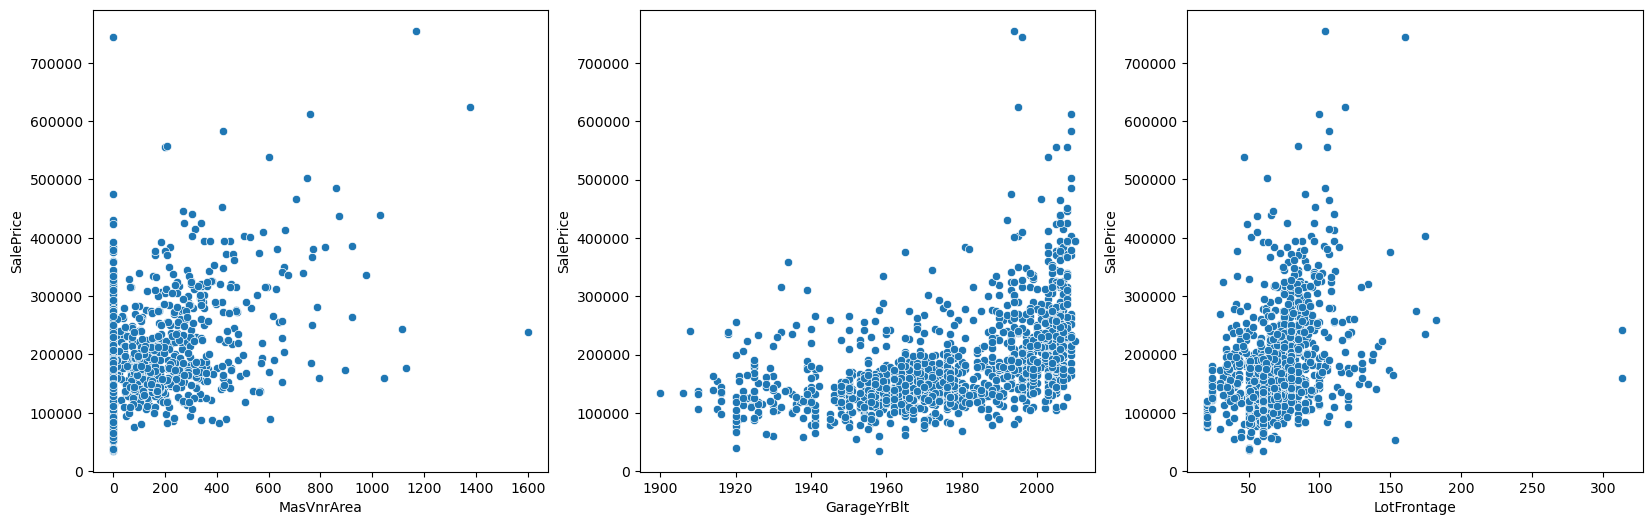

In [470]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6)) 

sns.scatterplot(data=df, x='MasVnrArea', y='SalePrice', ax=axes[0])
sns.scatterplot(data=df, x='GarageYrBlt', y='SalePrice', ax=axes[1])
sns.scatterplot(data=df, x='LotFrontage', y='SalePrice', ax=axes[2])

PoolQC, MiscFeature, Alley, Fence, and MasVnrType are simply features homes dont have, same for garage and basement related which have the same missing percentage (5.55% and ~2.5%).

drop:
- PoolQC (99.52% missing) - 7 homes have pools (0.4%)
- MiscFeature (96.30% missing) - 54 homes (3.7%) have miscellaneous features
- Alley (93.77% missing) - 91 properties (6.2%) have alley access
- Fence (80.75% missing) - 19.3% of properties have fences
- MasVnrArea & MasVnrType (0.55% and 59.7%) - Type has to many missing, changing how Area behaves (impact on SalePrice is scattered)
- GarageQual, GarageCond, & BsmtCond - majority "TA" (89.8%, 90.8%, and 89.8%)
- BsmtFinType2 - majority "Unf" (86.03%)
- Electrical - majority "SBrkr" (91.37%)
- LotFrontage (17.74% missing) - weak correlation visually

keep (for now):
- FireplaceQu - reasonable spread (Gd 26%, TA 21%, other) 
- GarageType - reasonable spread (Attchd 59%, Detchd 26%, others) 
- GarageFinish - decent spread among Fin, RFn, Unf 
- BsmtExposure - No 65%, but enough variety
- BsmtFinType1 - decent spread among GLQ, Unf, ALQ, BLQ, Rec, LwQ
- BsmtQual - decent spread among Gd, TA, Ex, Fa
- GarageYrBlt - low missing, seems to have strong correaltion with saleprice (newer garage = more valuable house)

In [471]:
dfnum= dfnum.drop(columns=['LotFrontage', 'MasVnrArea'])
dfcat= dfcat.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'GarageQual', 'GarageCond', 'BsmtCond', 'BsmtFinType2', 'Electrical'])


## Univariate and Bivariate

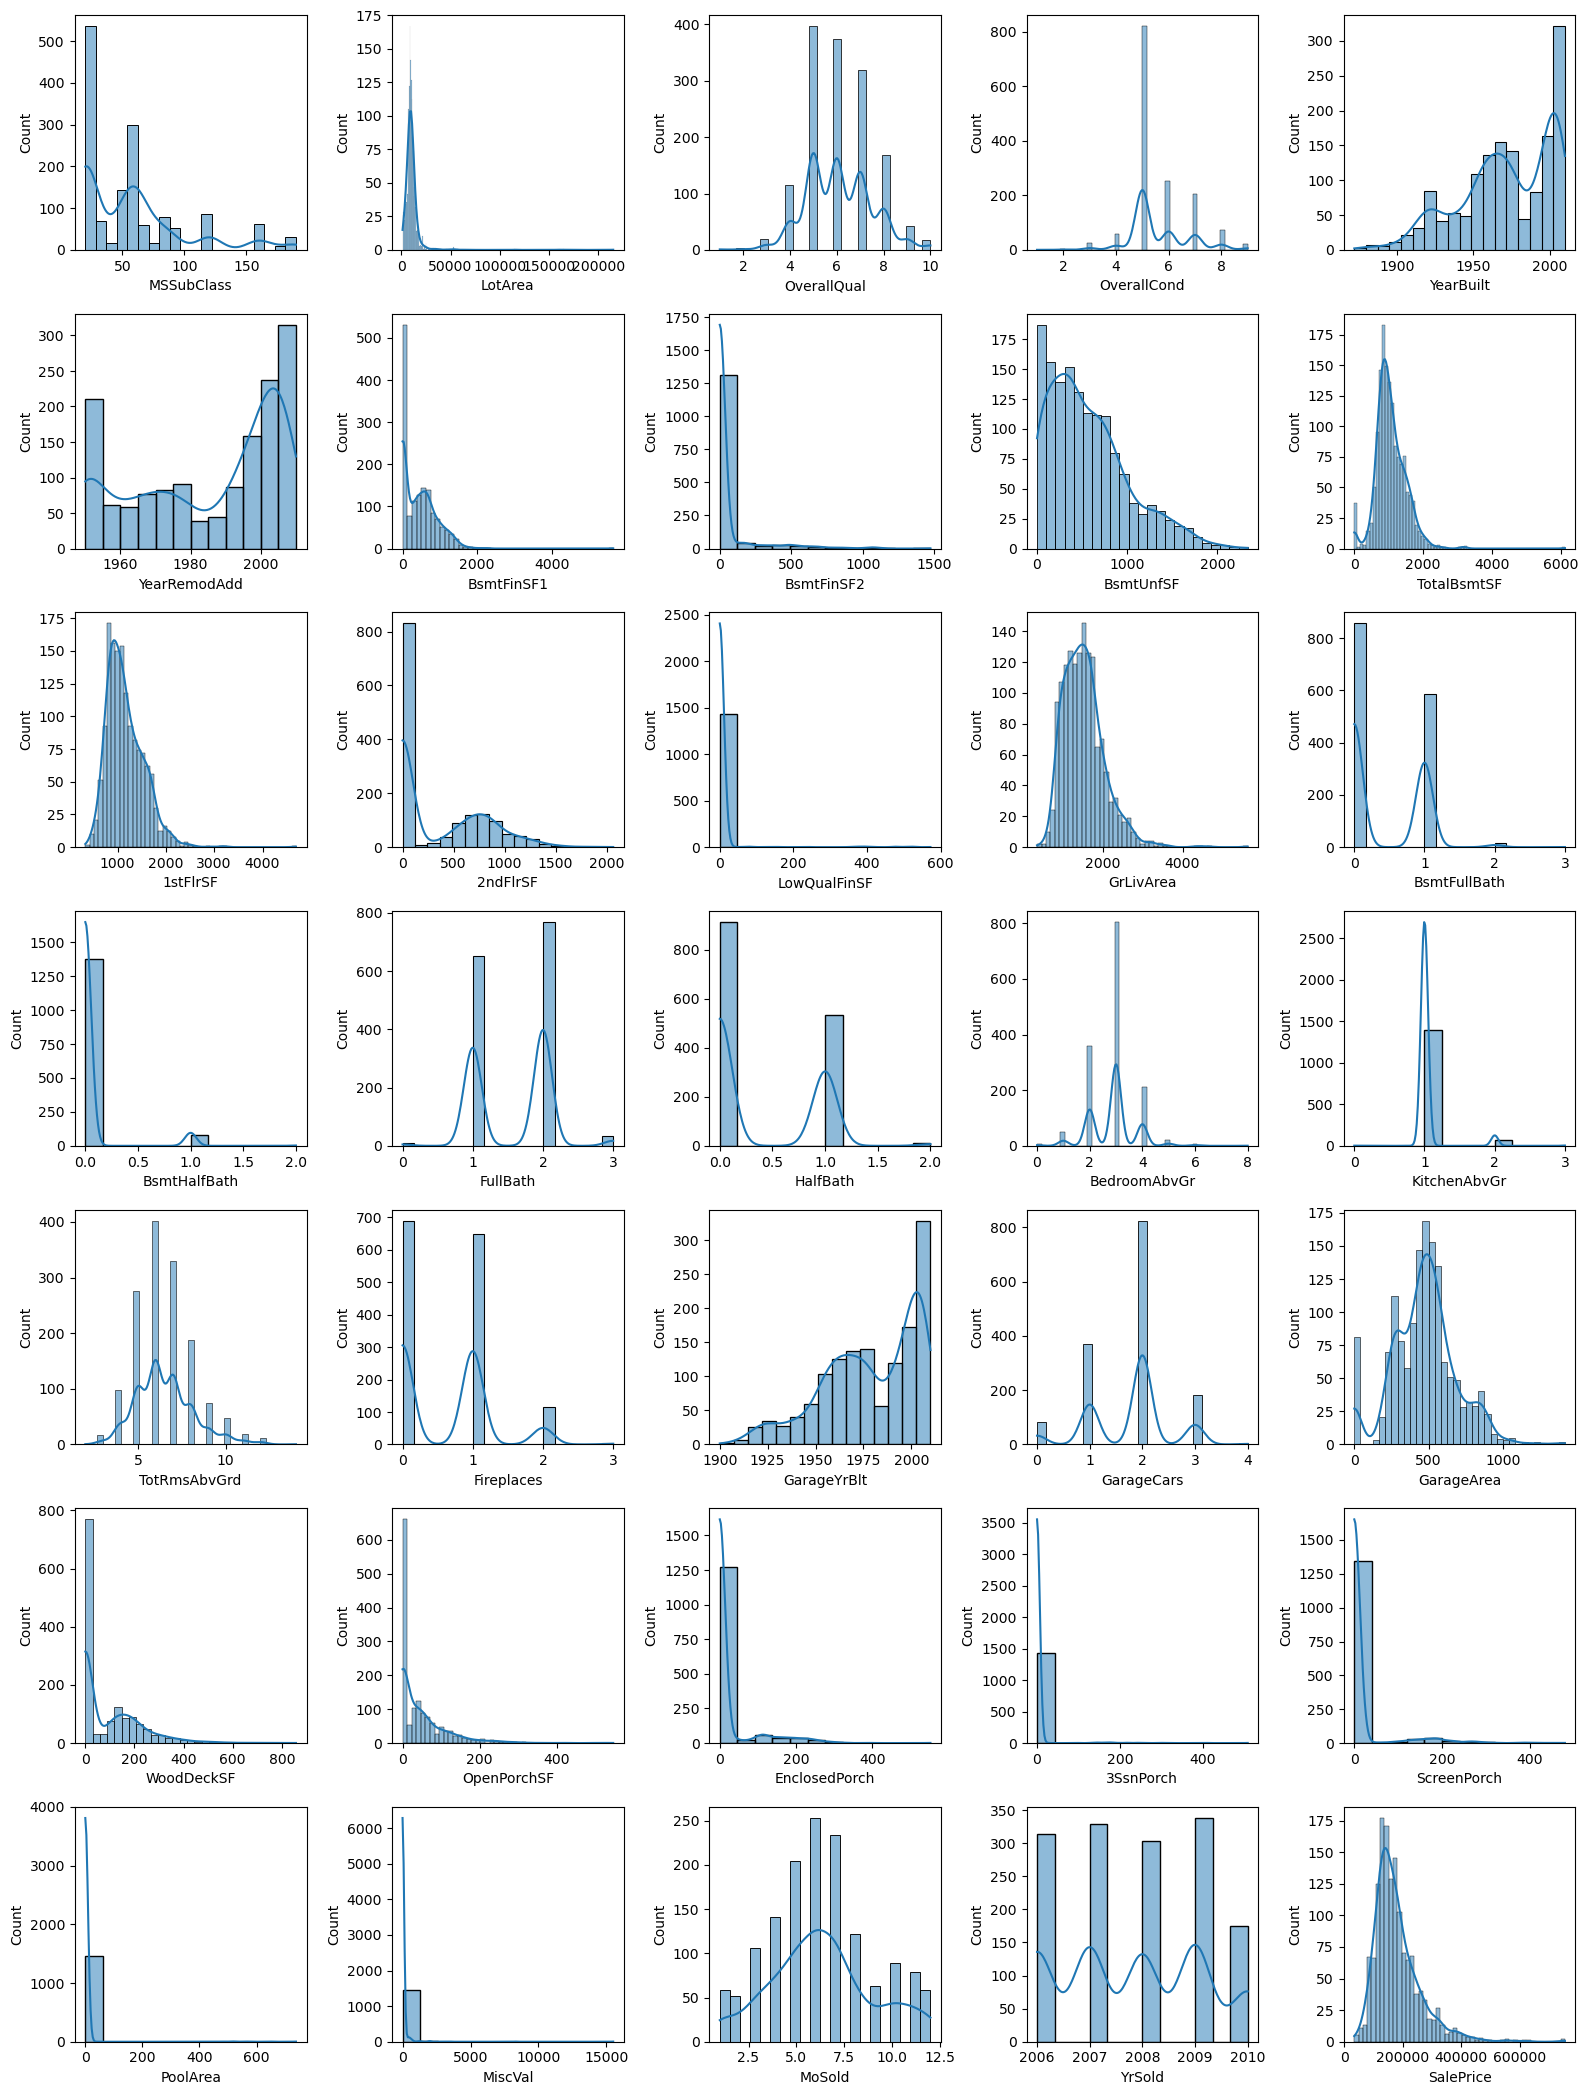

            Count  Percentage (%)
MSSubClass                       
20            536           36.71
30             69            4.73
40              4            0.27
45             12            0.82
50            144            9.86
60            299           20.48
70             60            4.11
75             16            1.10
80             58            3.97
85             20            1.37
90             52            3.56
120            87            5.96
160            63            4.32
180            10            0.68
190            30            2.05
         Count  Percentage (%)
LotArea                       
1300         1            0.07
1477         1            0.07
1491         1            0.07
1526         1            0.07
1533         2            0.14
...        ...             ...
70761        1            0.07
115149       1            0.07
159000       1            0.07
164660       1            0.07
215245       1            0.07

[1073 rows x 2 col

In [472]:
nrows = (32 + 5 - 1) // 5
fig, axes = plt.subplots(nrows, 5, figsize=(16, 3 * nrows))
axes = axes.flatten()

for i, column in enumerate(dfnum.columns):
    sns.histplot(data=df, x=column, ax=axes[i], kde=True)
    axes[i].set_xlabel(column)
plt.tight_layout()
plt.show()

for column in dfnum.columns:
    counts = df[column].value_counts().sort_index()
    percent = counts / len(df) * 100
    summary = pd.DataFrame({
        'Count': counts,
        'Percentage (%)': percent.round(2)
    })
    print(summary)

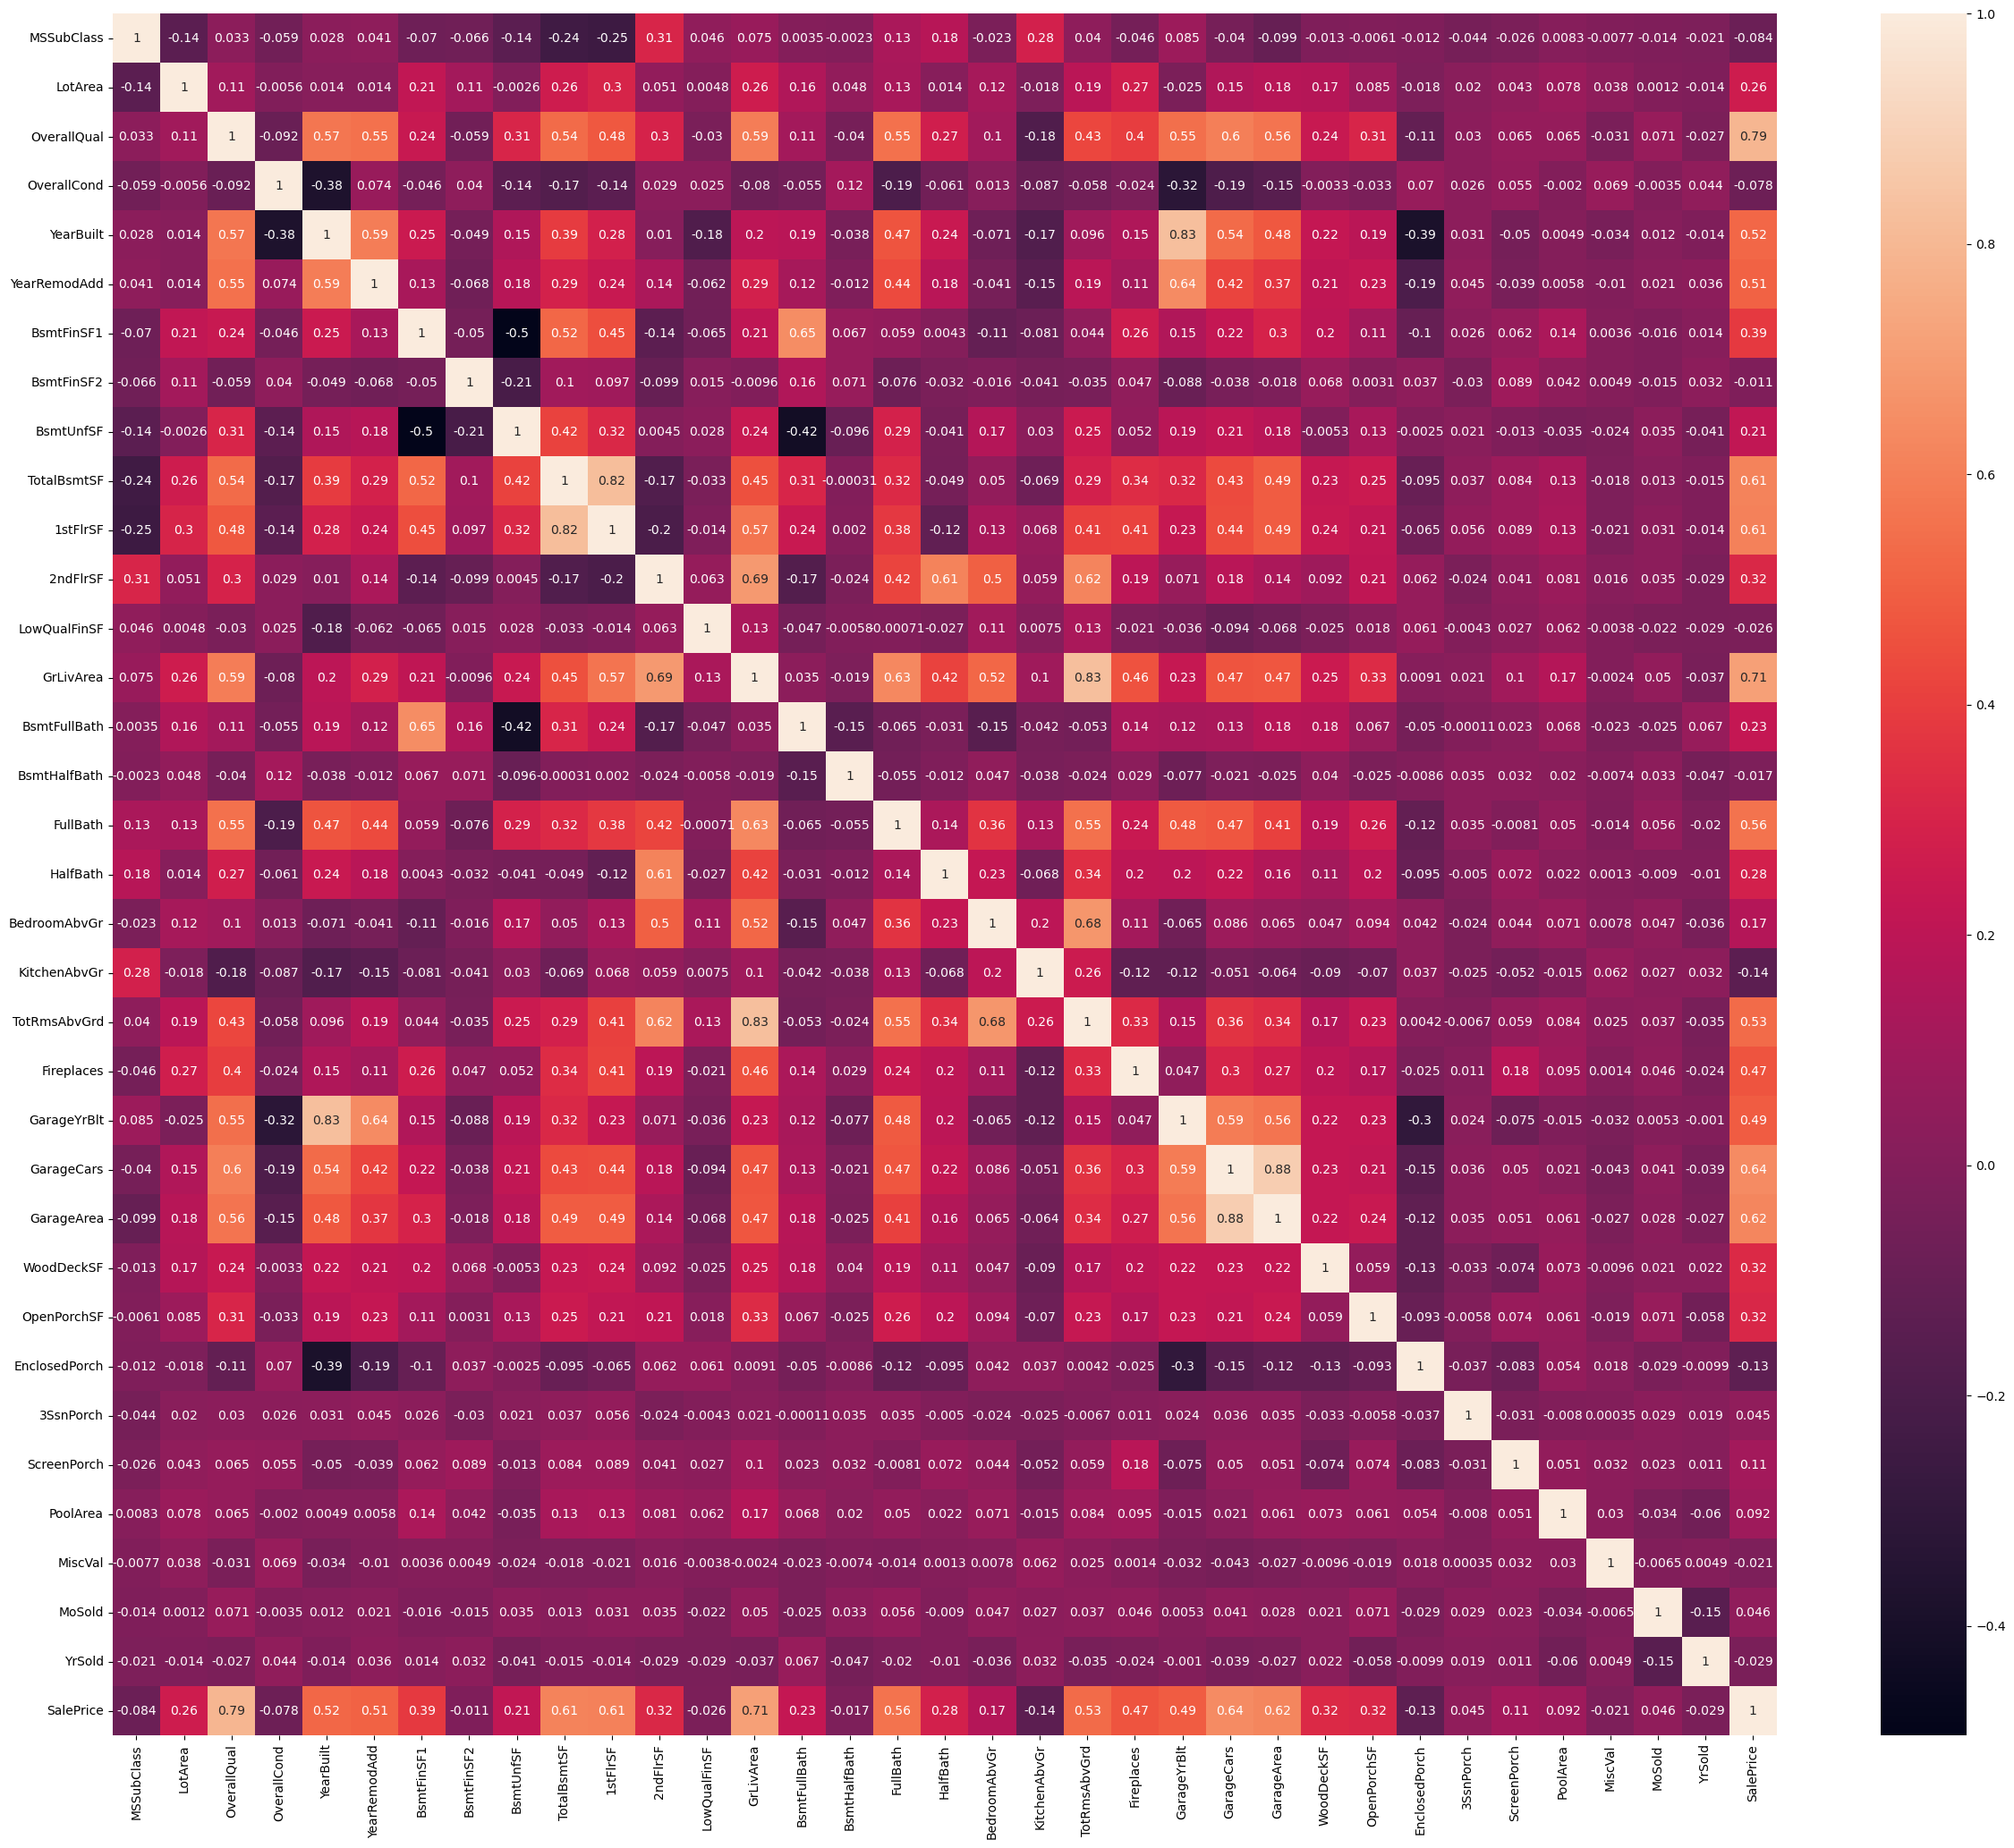

In [473]:
plt.figure(figsize=(30, 25))
sns.heatmap(dfnum.corr(), annot=True)
plt.show()

In [474]:
featurecorr = dfnum.corr()["SalePrice"][dfnum.corr()["SalePrice"] > 0.3]
featurecorr

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
BsmtFinSF1      0.386420
TotalBsmtSF     0.613581
1stFlrSF        0.605852
2ndFlrSF        0.319334
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
Fireplaces      0.466929
GarageYrBlt     0.486362
GarageCars      0.640409
GarageArea      0.623431
WoodDeckSF      0.324413
OpenPorchSF     0.315856
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [475]:
featurecorrdrop = dfnum.corr()["SalePrice"][dfnum.corr()["SalePrice"] < 0.3]
featurecorrdrop

MSSubClass      -0.084284
LotArea          0.263843
OverallCond     -0.077856
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
LowQualFinSF    -0.025606
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
Name: SalePrice, dtype: float64

Numeric Feature Analysis
- OverallQual: most homes score between 5 and 7, slightly above-average quality
- OverallCond: peaks at 5, average condition dominates
- YearBuilt & YearRemodAdd: most homes were built post-1950, remodels peaking around 2000
- LotArea & GrLivArea: right skewed distributions a few large homes/lots raise the average
- BsmtFinSF1, BsmtUnfSF, & TotalBsmtSF: right skewed, most homes have moderate basement sizes
- 1stFlrSF & 2ndFlrSF: first floor right skewed (moderate sizes); second floor spikes at 0, many homes are single story
- LowQualFinSF: skewed, mostly zero, most homes dont have low quality finishes
- FullBath, HalfBath, BsmtFullBath: Common to have 1–2 full baths and at most one half or basement bath
- BedroomAbvGr & KitchenAbvGr: most homes have 2–3 bedrooms and one kitchen
- YrSold & MoSold: most homes sold in Jun, lowest amount of homes were sold in 2010
- TotRmsAbvGrd: Counts all rooms except bathrooms; adds helpful context alongside bedrooms and living area.
- Fireplaces: Most homes have 0–1 fireplaces; modest positive impact on price.
- WoodDeckSF & OpenPorchSF: Right-skewed — many homes have none, but some have large decks/porches.
- GarageArea & GarageCars: Positively correlated with SalePrice; larger garages tend to increase home value.

drop:
- MiscVal - MiscFeature has alredy been dropped, majority of miscellaneous features for no extra cost, "0" (96.44%) 
- PoolArea - PoolQC has alredy been dropped, 99.52% missing and have no pool area consequently
- 3SsnPorch, ScreenPorch, & EnclosedPorch - majority "0" (98.36%, 92.05%, 85.75%)
- LowQualFinSF - majority "0" (98.22%), correlation with SalePrice ≈ -0.026
- BsmtFinSF2 - BsmtFinType2 has alredy been dropped, majority "0" (88.56%)
- BsmtHalfBath - majority "0" (94.38%), correlation with SalePrice ≈ -0.017
- KitchenAbvGr - majority "1" (95.34%), correlation with SalePrice ≈ -0.14
- MSSubClass - correlation with SalePrice ≈ -0.084
- LotArea - correlation with SalePrice ≈ 0.26
- OverallCond - correlation with SalePrice ≈ -0.078
- BsmtUnfSF - correlation with SalePrice ≈ 0.21
- BsmtFullBath - correlation with SalePrice ≈ 0.23
- HalfBath - correlation with SalePrice ≈ 0.28
- BedroomAbvGr - correlation with SalePrice ≈ 0.17
- MoSold - correlation with SalePrice ≈ 0.05
- YrSold  - correlation with SalePrice ≈ -0.03
- GarageYrBlt- Reflects when the garage was built, too similar to YearBuilt (0.83)
- 1stFlrSF - 0.82 correlation with TotalBsmtSF (slightly higher correlation with saleprice)
- TotRmsAbvGrd - 0.83 correlation with GrLivArea (slightly higher correlation with saleprice)
- GarageArea -  0.88 correlation with GarageCars (slightly higher correlation with saleprice)

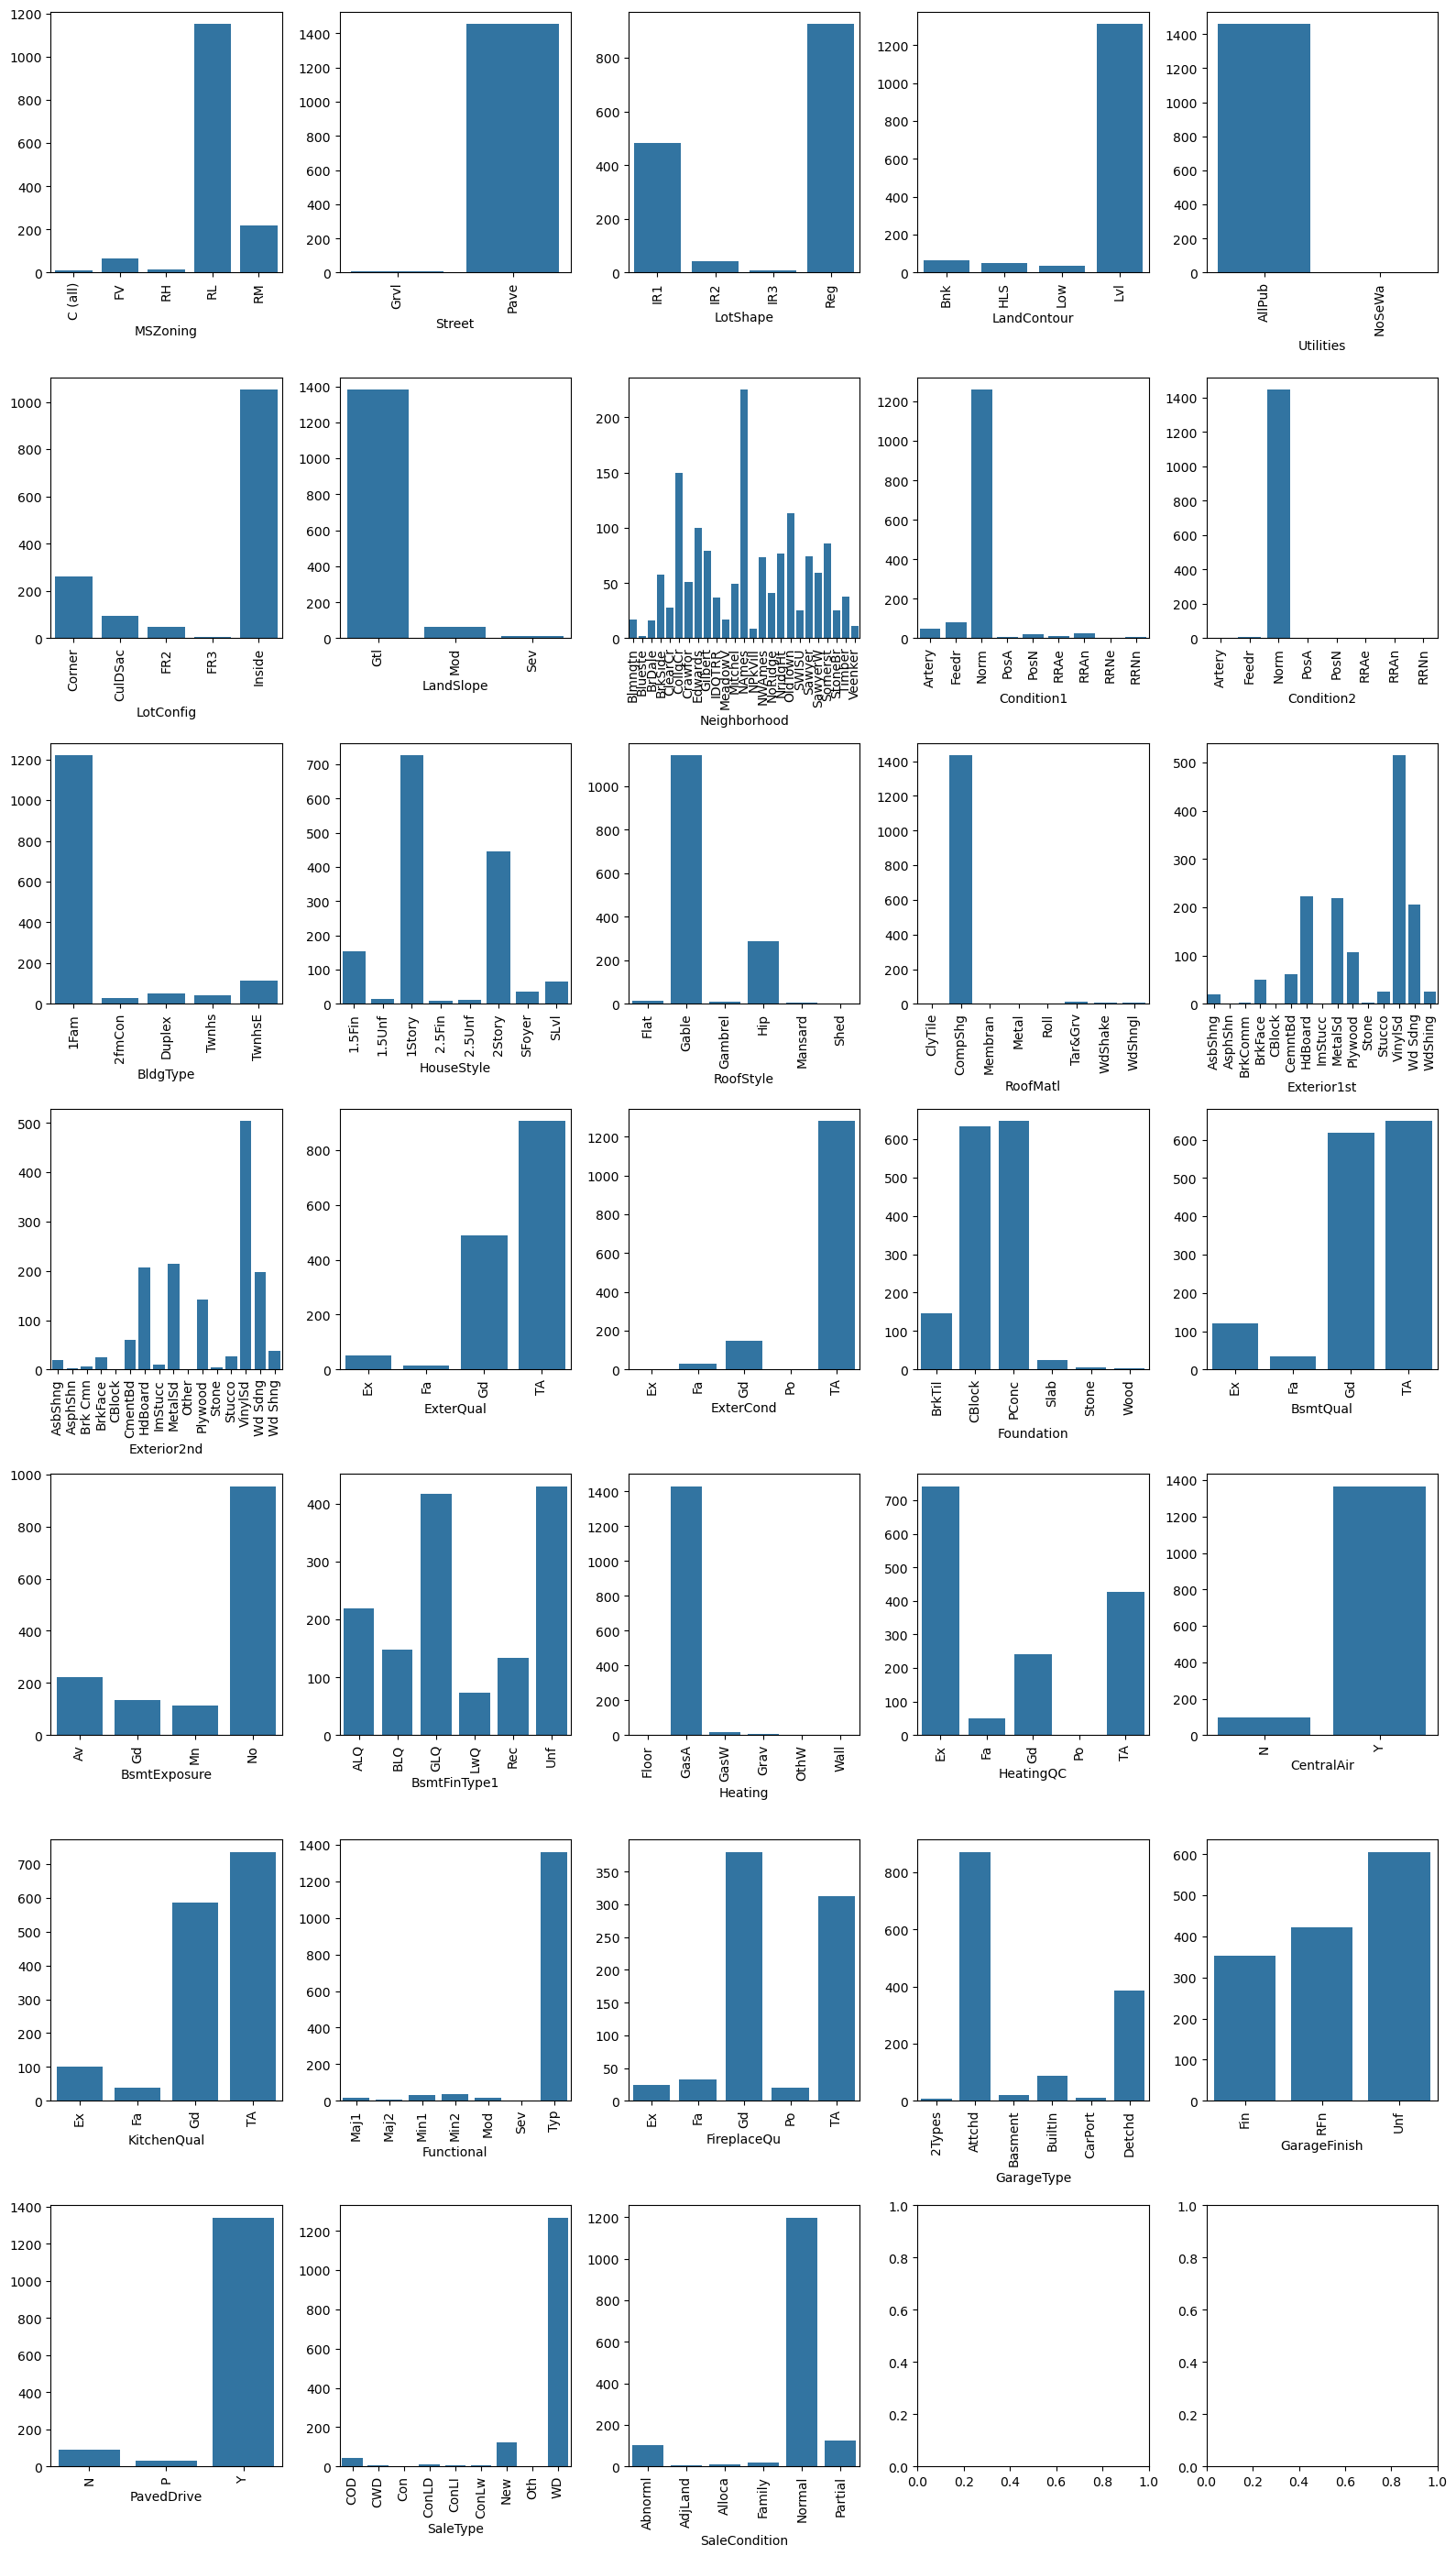

          Count  Percentage (%)
MSZoning                       
C (all)      10            0.68
FV           65            4.45
RH           16            1.10
RL         1151           78.84
RM          218           14.93
        Count  Percentage (%)
Street                       
Grvl        6            0.41
Pave     1454           99.59
          Count  Percentage (%)
LotShape                       
IR1         484           33.15
IR2          41            2.81
IR3          10            0.68
Reg         925           63.36
             Count  Percentage (%)
LandContour                       
Bnk             63            4.32
HLS             50            3.42
Low             36            2.47
Lvl           1311           89.79
           Count  Percentage (%)
Utilities                       
AllPub      1459           99.93
NoSeWa         1            0.07
           Count  Percentage (%)
LotConfig                       
Corner       263           18.01
CulDSac       94       

In [476]:
nrows = (31 + 5 - 1) // 5
fig, axes = plt.subplots(nrows, 5, figsize=(16, 4 * nrows))
axes = axes.flatten()

for i, column in enumerate(dfcat.columns):
    value_counts = df[column].value_counts().sort_index()
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i])
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].set_xlabel(column)
plt.tight_layout()
plt.show()

for column in dfcat.columns:
    counts = df[column].value_counts().sort_index()
    percent = counts / len(df) * 100
    summary = pd.DataFrame({
        'Count': counts,
        'Percentage (%)': percent.round(2)
    })
    print(summary)

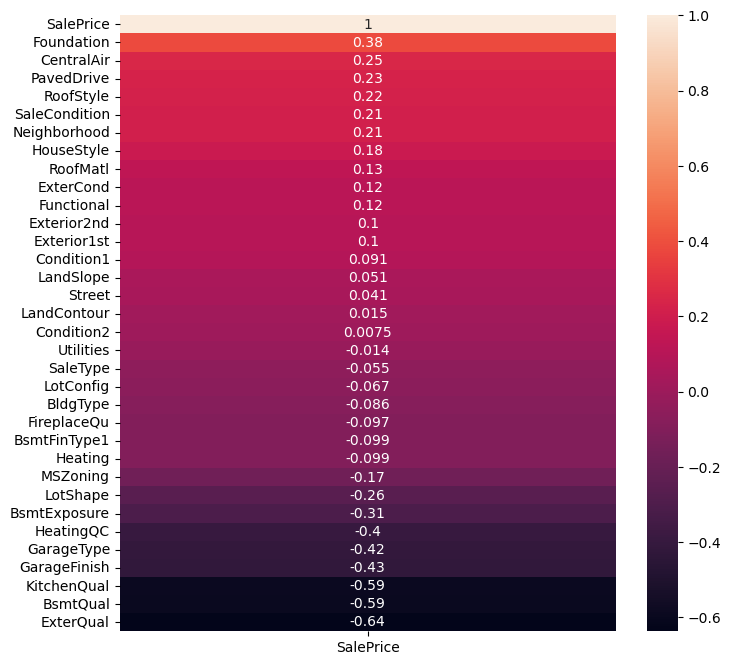

In [477]:
# features + SalePrice 
catprice = dfcat.copy()
catprice['SalePrice'] = df['SalePrice']

# convert to numeric with label encoding
for col in catprice.columns:
    if col != 'SalePrice':  # skip SalePrice
        catprice[col] = catprice[col].fillna('None')
        catprice[col] = catprice[col].astype('category').cat.codes

# compute correlations with SalePrice
corr = catprice.corr()['SalePrice'].sort_values(ascending=False)

# plot
plt.figure(figsize=(8, 8))
sns.heatmap(corr.to_frame(), annot=True)
plt.show()


drop:
- Street: majority paved streets (99.6%)
- LandContour: majority "Lvl" (89.8%)
- Utilities: majority "AllPub" (99.9%)
- LandSlope: majority "Gtl" (94.7%)
- Condition1 & Condition2: 86.3% and 99.0% "Norm" 
- RoofStyle: 78.15% Gable, 19.59% Hip; correlation with SalePrice = 0.22
- RoofMatl: majority "CompShg" (98.22%)
- ExterCond: majority in ExterCond "TA" (87.81%), correlation with SalePrice = 0.12
- Heating: majority "GasA" (97.81%)
- Functional: majority "Typ" (93.15%)
- SaleType: majority "WD" (86.78%)
- MSZoning: majority "RL" (78.84%), correlation with SalePrice = -0.17
- LotShape: majority "Reg" (63.36%), correlation with SalePrice = -0.26
- LotConfig: majority "Inside" (72.05%), correlation with SalePrice = -0.07
- Neighborhood: wide distribution, no single category dominating too heavily; correlation with SalePrice = 0.21
- BldgType: majority "1Fam" (83.56%), correlation with SalePrice = -0.09
- HouseStyle: 1Story and 2Story dominant slightly (49.73%, 30.48%); correlation with SalePrice = 0.18
- Exterior1st & Exterior2nd: wide distribution, VinylSd is most common (~35%); correlation with SalePrice = 0.1
- BsmtFinType1: wide distribution; correlation with SalePrice = -0.1
- CentralAir: majority "Y" (93.46%); correlation with SalePrice = 0.25
- FireplaceQu: correlation with SalePrice = -0.1
- PavedDrive: majority paved (91.78%), correlation with SalePrice = 0.23
- SaleCondition: majority "normal" (82.05%), correlation with SalePrice = 0.21


keeping .3 and above same goes for negative:
- Foundation:      correlation with SalePrice = 0.382479    variation among PConc, CBlock, and BrkTil
- BsmtExposure:    correlation with SalePrice = -0.309043   65% No, but correlation -.3
- HeatingQC:       correlation with SalePrice = -0.400178   variation among Ex, TA, and Gd
- GarageType:      correlation with SalePrice = -0.415283   good spread, Attchd and Detchd dominant
- GarageFinish:    correlation with SalePrice = -0.425684   variation among Fin, RFn, and Unf
- KitchenQual:     correlation with SalePrice = -0.589189   variation among TA, Gd, and Ex
- BsmtQual:        correlation with SalePrice = -0.593734   good spread, Gd and TA dominant
- ExterQual:       correlation with SalePrice = -0.636884   good spread, TA and Gd dominant

In [478]:
dfnum= dfnum.drop(columns=['MiscVal', 'PoolArea', '3SsnPorch', 'ScreenPorch', 'EnclosedPorch', 'LowQualFinSF', 'BsmtFinSF2', 'BsmtHalfBath', 'KitchenAbvGr', 'MSSubClass', 'LotArea', 'OverallCond', 'BsmtUnfSF', 'BsmtFullBath', 'HalfBath', 'BedroomAbvGr', 'MoSold', 'YrSold', 'GarageYrBlt', '1stFlrSF', 'TotRmsAbvGrd', 'GarageArea'])
dfcat= dfcat.drop(columns=['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'RoofStyle', 'RoofMatl', 'ExterCond', 'Heating', 'Functional', 'SaleType', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'Exterior1st', 'Exterior2nd', 'BsmtFinType1', 'CentralAir', 'FireplaceQu', 'PavedDrive', 'SaleCondition'])

## SalePrice Feature

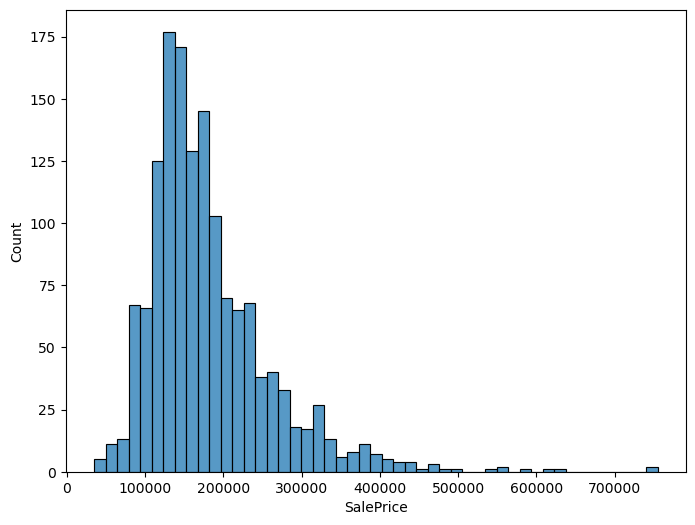

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [479]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x="SalePrice")
plt.show()

print(df['SalePrice'].describe())

- right-skewed distribution, pulling the mean above the median
- most home prices between $100,000-$200,000 
- peak frequency around $125,000-$150,000
- long tail extends to $755,000

### SalePrice Feature Bivariate

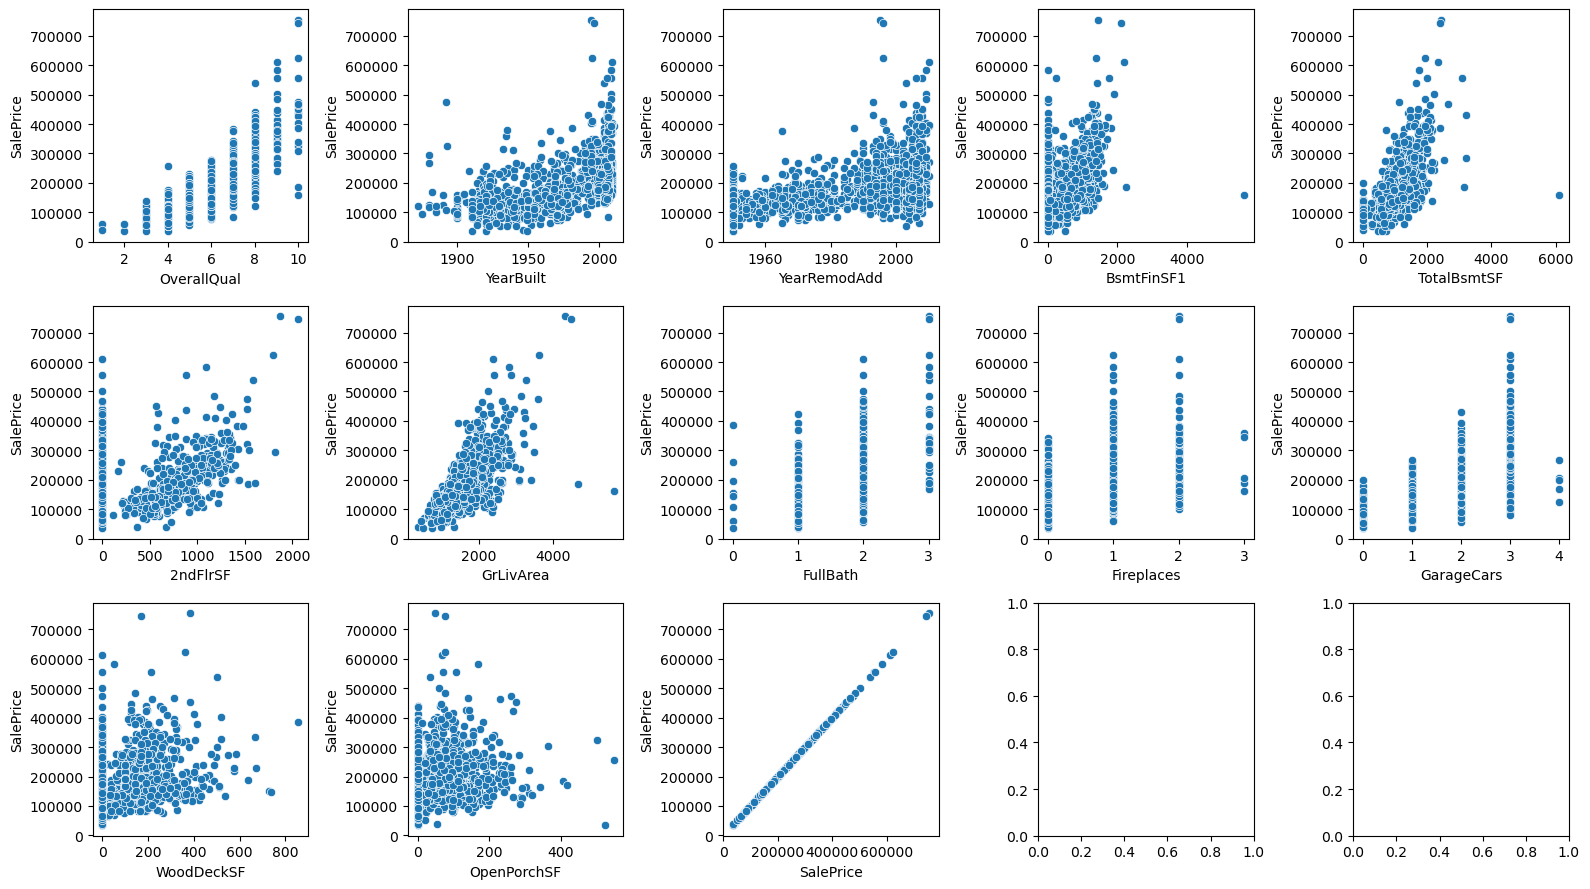

In [480]:
nrows = (11 + 5 - 1) // 5
fig, axes = plt.subplots(nrows, 5, figsize=(16, 3 * nrows))
axes = axes.flatten()

for i, column in enumerate(dfnum.columns):
    sns.scatterplot(data=df, x=column, y='SalePrice', ax=axes[i])
    axes[i].set_xlabel(column)
plt.tight_layout()
plt.show()


Keep (strong correlation with price increase):
- OverallQual: strong linear pattern; correlation with SalePrice ≈ 0.79
- YearBuilt: moderate positive trend; correlation with SalePrice ≈ 0.52
- YearRemodAdd:	moderate positive trend; correlation with SalePrice ≈ 0.51
- TotalBsmtSF: linear with slight scatter; correlation with SalePrice ≈ 0.61
- GrLivArea: strong linear pattern; correlation with SalePrice ≈ 0.71 
- GarageCars: moderate clusters, linear; correlation with SalePrice ≈ 0.64
- FullBath:	moderate clusters, linear; correlation with SalePrice ≈ 0.56


drop: 
- 2ndFlrSF:	no clear pattern; correlation with SalePrice ≈ 0.32
- Fireplaces: sparse & discrete; correlation with SalePrice ≈ 0.47
- WoodDeckSF: scattered; correlation with SalePrice ≈ 0.32
- OpenPorchSF: scattered; correlation with SalePrice ≈ 0.32
- BsmtFinSF1: slight trend scattered, weak compared to TotalBsmtSF; correlation with SalePrice ≈ 0.39 

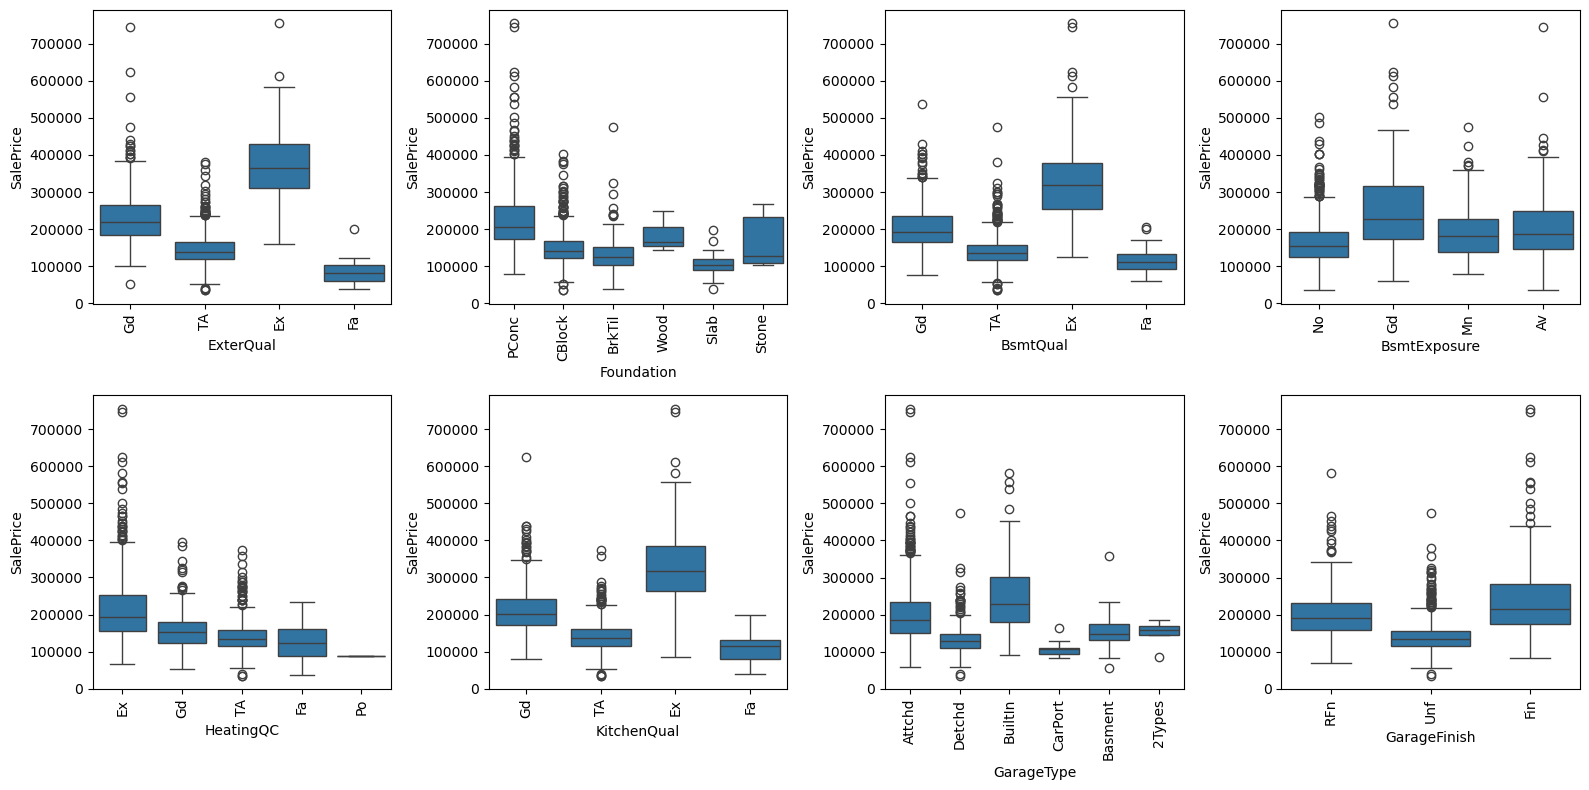

In [481]:
nrows = (6 + 5 - 1) // 5
fig, axes = plt.subplots(nrows, 4, figsize=(16, 4 * nrows))
axes = axes.flatten()

for i, column in enumerate(dfcat.columns):
    sns.boxplot(data=df, x=column, y='SalePrice', ax=axes[i])
    axes[i].set_xlabel(column)
    axes[i].tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

Drop:
- Foundation (correlation: 0.382): overlap between categories
- BsmtExposure (correlation: -0.309): shows some relationship, but lower than other basement-related features
- HeatingQC (correlation: -0.400): overlap between categories
- GarageType & GarageFinish correlation -0.415 & -0.427, low compared to lowest numerical kept 

In [482]:
dfnum= dfnum.drop(columns=['2ndFlrSF', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'BsmtFinSF1'])
dfcat= dfcat.drop(columns=['Foundation', 'BsmtExposure', 'HeatingQC', 'GarageType', 'GarageFinish'])